No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


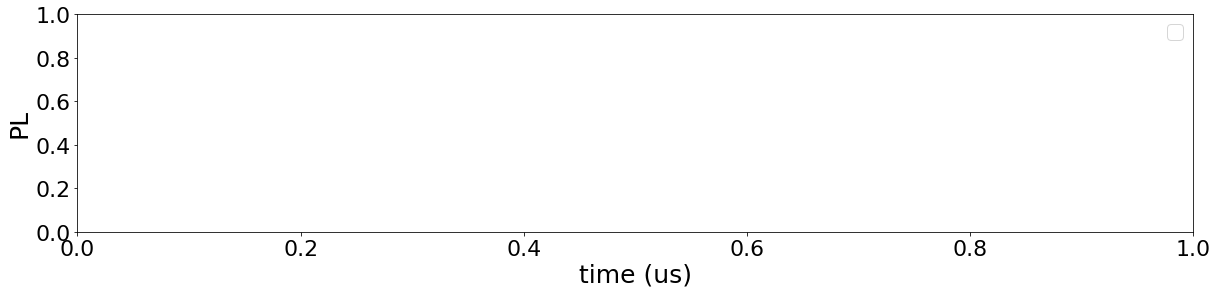

0.9997915162170661
0.9995828973026386
0.9993742132404279
0.9991567280686036
0.9989566649863365
0.9987139589301997
0.9984642201364544
0.9983258025022907
0.9977764494263536
0.9977604516567621
0.9973178160586729
0.9959606365125403
0.9972800837809961
0.9933154322229909
0.9926157442873909
0.9948847256075005
0.9699079373993584
0.9864693417749657
0.9384694073787534
0.5357912323895213
0.22791408473077562
0.5858348024254822
0.9770495307573743
0.9343701595573648
0.9325676868851906
0.9944913334551362
0.9544337727686734
0.9782584165879571
0.9869374120218819
0.9655892871009051
0.9919157384263131
0.9777792413743718
0.9776279792021401
0.9920680009848513
0.9734704741623764
0.9876837324539917
0.9852308911994161
0.9758444749459065
0.9918302362414531
0.9777517139916669
0.9816349927100956
0.9865567653707878
0.9742294566251939
0.9894965784141888
0.9799006015935305
0.9774373661685181
0.989763738310161
0.9720960605412271
0.9842183094351777
0.9824847006646267
0.9692563557019807
0.9889983749518148
0.9689193874

'\nlines=[]\n#inside_lines = np.zeros()\nresult=open("Nuclear_theo_result.csv","w")\nfor i in range(len(lines)):\n    result.writelines(str(lines[i]))\n    result.writelines("\n")\nresult.close()'

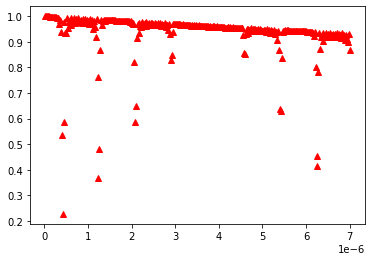

In [17]:
import numpy as np
from scipy import linalg as sp_linalg
from matplotlib import pyplot as plt
from numpy.linalg import matrix_power
import math
import pandas as pd

#detection=pd.read_excel("Nucelar_detection2.xlsx",engine='openpyxl',usecols='A:B')
#print(detection)
plt.figure(figsize=(20,4))

plt.xticks(fontsize =22) #그래프 눈금 숫자 크기 조절
plt.yticks(fontsize =22) #그래프 눈금 숫자 크기 조절
plt.xlabel('time (us)',fontsize=25)
plt.ylabel('PL',fontsize=25)
plt.legend(fontsize=20)


#plt.plot(detection['a'],detection['b'])

plt.show()

#Basic paramter
pi=math.pi
B=499.2*10**(-4)
A= 125*10**(3)*pi*2
C= 90*10**(3)*pi*2
N=8
rc=10.71*10**(6)*(pi)*2
wL=rc*B
fL=wL/(2*pi)
t1 = 2.2*10**(-3)
t2 = 2000*10**(-6)
#print(wL)
#print(fL)

#nuclear spin pauli matrix

lx=np.matrix([[0,1],[1,0]])*1/2
lz=np.matrix([[1,0],[0,-1]])*1/2
#print(lx)
#print(lz)

#Hamiltonian
H0=wL*lz
H1=(A+wL)*lz+C*lx
#print(H0)
#print(H1)



for i in np.linspace(0.02*10**(-6),7*10**(-6),350):
    #print(i)
    #test=sp_linalg.expm(lz)
    #print(test)
    X=complex(0,1)
    #print(X)
    sta=sp_linalg.expm(-X*(H0)*i)
    stb=sp_linalg.expm(-X*(H1)*2*i)
    stc=sp_linalg.expm(-X*(H1)*i)
    std=sp_linalg.expm(-X*(H0)*2*i)
    #print(sta)
    #print(stb)
    V0=np.dot(np.dot(sta,stb),sta)
    V1=np.dot(np.dot(stc,std),stc)
    U0=matrix_power(V0,N)
    U1=matrix_power(V1,N)
    #print(V0)
    #print(V1)
    #U0=V0**(N/2)
    #U1=V1**(N/2)
    CU1=U1.conjugate(U1)
    CTU1=CU1.T
    #print(CU1)
    #print(CTU1)
    #print(U0)
    #print(U1)
    S1=np.dot(U0,CTU1)
    #print(S1)
    S2=np.trace(S1)
    #print(S2)
    S=(S2.real)*0.5
    #print(S)
    P=(S+1)/2
    P_decay=1/6*math.exp(-2*2*N*i/t1)+1/3+1/2*S*math.exp(-2*2*N*i/t2)
    #print(P)
    print(P_decay)
    #plt.plot(i,P,'b^')
    plt.plot(i,P_decay,'r^')

    
    
#caculation theta
theta=np.arctan(C/A)
rad_theta=360*theta/(2*pi)
#print(theta)
print(rad_theta)

#calculation distance between NV and 13C
MU0=4*pi*10**(-7)
RC=1.0705*10**(7)
RE=2.8025*10**(10)
plank=6.62607*10**(-34)
constant=MU0*RC*RE*plank/(4*pi)
cospal=np.cos(rad_theta)
sinpal=np.sin(rad_theta)
#print(constant)
#print(cospal)
#print(sinpal)
dis=(constant**(2)*(1-3*cospal**(2))**(2)+constant**(2)*9*cospal**(2)*sinpal**(2))/((A/(2*pi))**(2)+(C/(2*pi))**(2))
#print(dis)
distance=dis**(1/6)
print(distance)
'''
lines=[]
#inside_lines = np.zeros()
result=open("Nuclear_theo_result.csv","w")
for i in range(len(lines)):
    result.writelines(str(lines[i]))
    result.writelines("\n")
result.close()'''